In [1]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [2]:
# Load dataset from JSON
with open('dataset_1000_entries.json', 'r') as file:
    data = json.load(file)

# Convert to DataFrame
df = pd.DataFrame(data)

In [3]:
# Separate features and target
X = df[['Kesesuaian_Rencana', 'Persentase_Dana', 'Selisih_Hari']]
y = df['Saran']  # 'Saran' is the target

In [4]:
# Encode the target variable (Saran)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [6]:
# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(objective='multi:softmax', n_estimators=100, learning_rate=0.1, max_depth=5)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

In [7]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# If needed, decode the predicted labels back to original labels
predicted_labels = le.inverse_transform(y_pred)

Accuracy: 97.00%


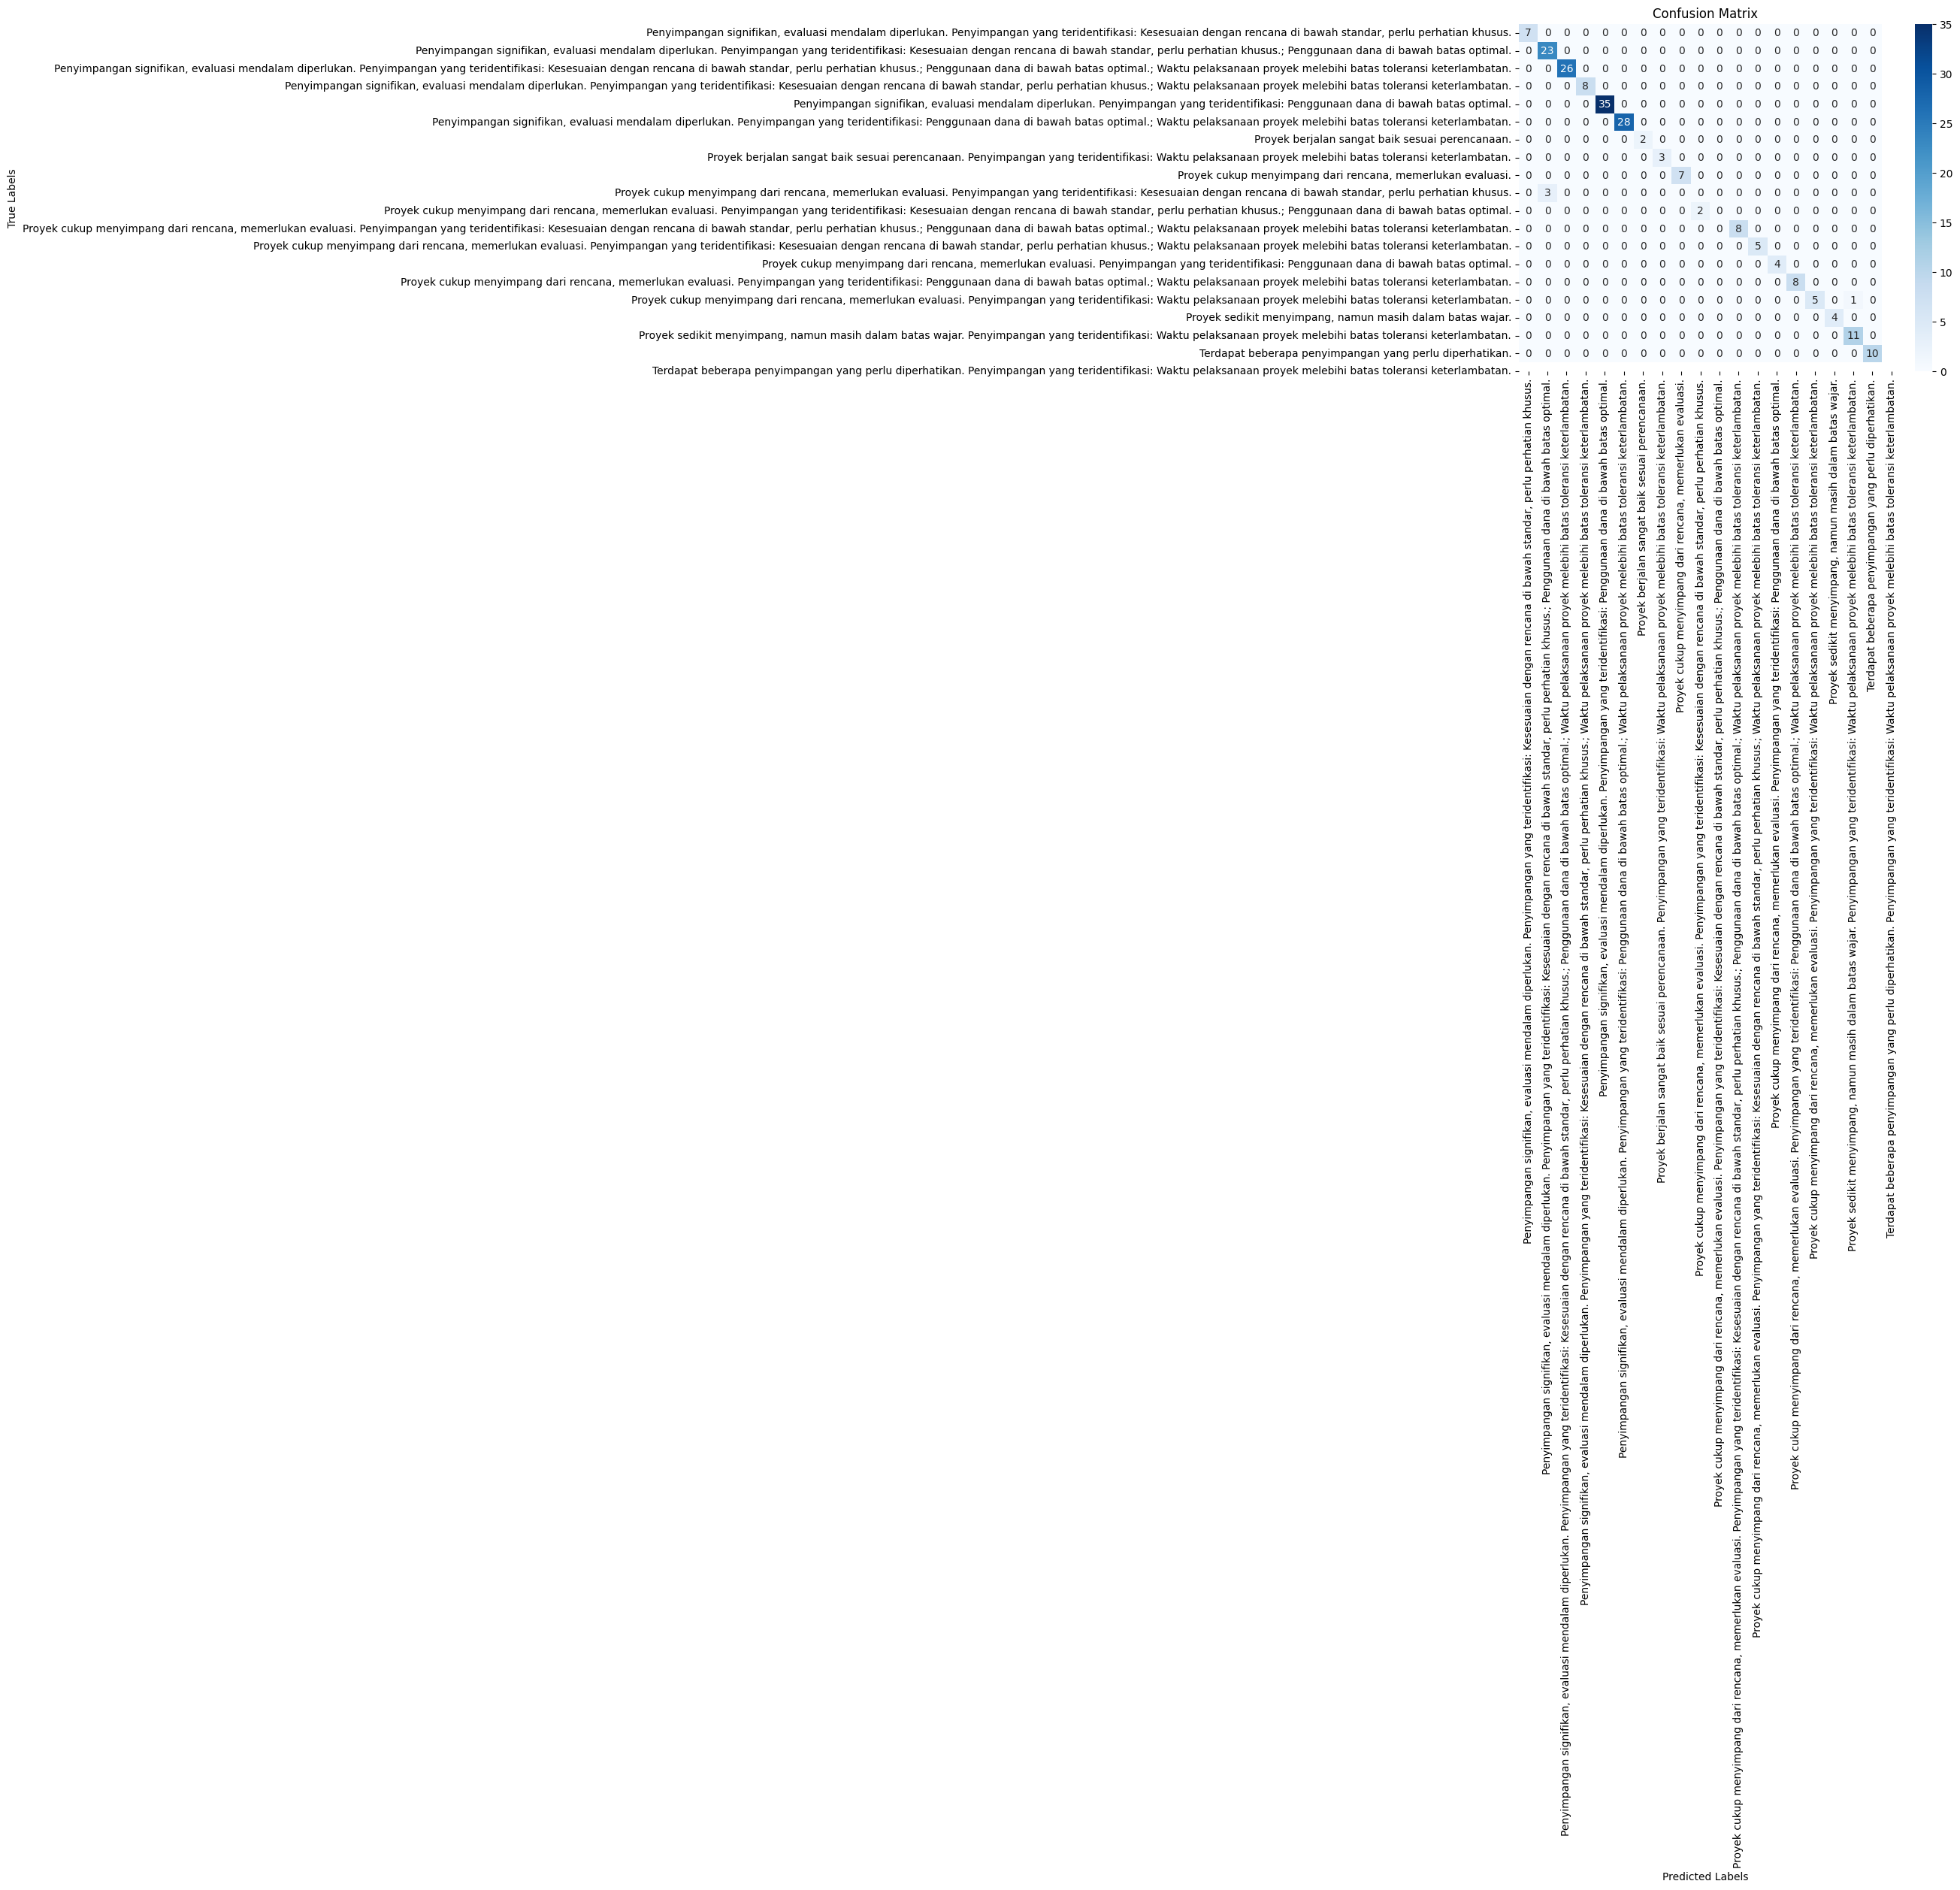

In [8]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [11]:
# Contoh data y_test (label sebenarnya)
y_test = le.inverse_transform(y_test)
y_test = pd.Series(y_test, name='y_test')
y_test

0      Penyimpangan signifikan, evaluasi mendalam dip...
1      Penyimpangan signifikan, evaluasi mendalam dip...
2      Proyek cukup menyimpang dari rencana, memerluk...
3      Penyimpangan signifikan, evaluasi mendalam dip...
4      Terdapat beberapa penyimpangan yang perlu dipe...
                             ...                        
195    Terdapat beberapa penyimpangan yang perlu dipe...
196    Proyek cukup menyimpang dari rencana, memerluk...
197    Penyimpangan signifikan, evaluasi mendalam dip...
198    Proyek berjalan sangat baik sesuai perencanaan...
199    Penyimpangan signifikan, evaluasi mendalam dip...
Name: y_test, Length: 200, dtype: object

In [13]:
# Contoh data y_predicted (label hasil prediksi)
predicted_labels = le.inverse_transform(y_pred)
y_predicted = pd.Series(predicted_labels, name='y_predicted')
y_predicted

0      Penyimpangan signifikan, evaluasi mendalam dip...
1      Penyimpangan signifikan, evaluasi mendalam dip...
2      Proyek cukup menyimpang dari rencana, memerluk...
3      Penyimpangan signifikan, evaluasi mendalam dip...
4      Terdapat beberapa penyimpangan yang perlu dipe...
                             ...                        
195    Terdapat beberapa penyimpangan yang perlu dipe...
196    Proyek cukup menyimpang dari rencana, memerluk...
197    Penyimpangan signifikan, evaluasi mendalam dip...
198    Proyek berjalan sangat baik sesuai perencanaan...
199    Penyimpangan signifikan, evaluasi mendalam dip...
Name: y_predicted, Length: 200, dtype: object

In [14]:
import pickle

# Simpan model ke file .pkl
with open('xgb_model.pkl', 'wb') as model_file:
    pickle.dump(xgb_model, model_file)

# Simpan label encoder
with open('label_encoder.pkl', 'wb') as le_file:
    pickle.dump(le, le_file)
